# Прогнозирование цены автомобиля по данным сайта am.ru

# 1. Описание набора данных и признаков

Данные собраны с сайта www.am.ru с помощью парсера, написанного в библиотеках requests и BeautifulSoup так, как это описано в видео https://www.youtube.com/watch?v=zlWiw99bBUk&index=3&list=PLlWXhlUMyoobMzou-Hl6HQWcClzg85_TZ. Отдельное спасибо Олегу Молчанову - автору видео-уроков по парсингу сайтов. Парсинг производился с 8 по 13 февраля 2018 г.
Ссылка на данные: https://drive.google.com/open?id=1Kxngy1LJSOEH83IFex-ddTAb2xxkNB9G.
Данные описывают ~213k объявлений о продаже автомобилей на сайте am.ru по следующим признакам:
    1) price - цена автомобиля, руб.;
    2) marka - марка, поколение автомобиля;
    3) adres - субъект РФ, город, адрес продавца;
    4) avtodiler - =1, если продавец - Автодилер;
    5) god - год выпуска автомобиля;
    6) probeg - пробег, км.;
    7) kuzov_cat - тип кузова;
    8) dverej - количество дверей;
    9) kpp - вид коробки передач;
    10) dvigl - объем двигателя, л.;
    11) toplivo - тип топлива;
    12) pravrul - =1, если правый руль;
    13) cvet - цвет автомобиля;
    14) privod - тип привода автомобиля;
    15) moschn - мощность двигателя, л.с.;
    16) nerastamozh - =1, если автомобиль не растаможен;
    17) vladel - число официальных владельцев автомобиля;
    18) vinotch - =1, если автомобиль проверен по VIN;
    19) bityj - =1, если автомобиль битый.
По имеющимся данным решается задача прогнозирования цены автомобиля по описанным выше признакам. Обученная модель позволит определять потенциальную рыночную цену или ее предсказательный интервал по заявленным проадвцом характеристикам автомобиля.

# 2. Первичный анализ данных

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('project_car_price_19_feat~210k.csv', encoding='cp1251')

In [38]:
df = df.iloc[:, 1:]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213852 entries, 0 to 213851
Data columns (total 19 columns):
marka          213852 non-null object
price          213852 non-null int64
adres          213852 non-null object
avtodiler      213852 non-null int64
god            213852 non-null int64
probeg         206801 non-null float64
kuzov_cat      213852 non-null object
dverej         212538 non-null float64
kpp            213802 non-null object
dvigl          213693 non-null float64
toplivo        213846 non-null object
pravrul        213852 non-null int64
cvet           213832 non-null object
privod         213442 non-null object
moschn         212753 non-null float64
nerastamozh    213852 non-null int64
vladel         197413 non-null float64
vinotch        213852 non-null int64
bityj          213852 non-null int64
dtypes: float64(5), int64(7), object(7)
memory usage: 31.0+ MB


In [49]:
continuous = ['price', 'god', 'probeg', 'dvigl', 'moschn', 'vladel', 'dverej']

binary = ['avtodiler', 'pravrul', 'nerastamozh', 'vinotch', 'bityj']

categorical = ['kuzov_cat', 'kpp', 'toplivo', 'cvet', 'privod']

multicategorical = ['marka', 'adres']

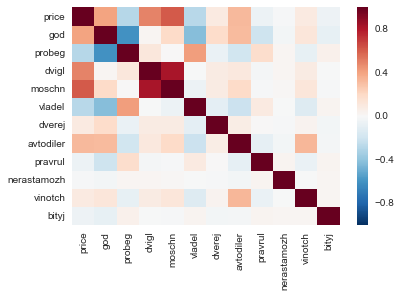

In [52]:
sns.heatmap(df[continuous + binary].corr())